# Check annotations sinchronization

In [9]:
from spinco import *

import os
import pandas as pd
import numpy as np
import pyedflib
import pickle as pkl
from plotly import express as px
from matplotlib import pyplot as plt
import datetime

In [10]:
edfpath="D:\SpinCo\MASS\edfs"
annopath="D:\SpinCo\MASS\\annotations"
signalspath="D:\SpinCo\MASS\signals"

In [11]:
checkfiles={
    'psgbase':edfpath+"/01-02-0003 Base.edf",
    'psgpath':edfpath+"/01-02-0003 PSG.edf",
    'annobase':annopath+"/01-02-0003 Base.edf",
    'e1path':annopath+"/01-02-0003 Spindles_E1.edf",
    'e2path':annopath+"/01-02-0003 Spindles_E2.edf"
}

In [12]:
for name, edffile in checkfiles.items():
    print("*********************")
    print(name)
    signals, signal_headers, header = pyedflib.highlevel.read_edf(edffile)
    print(header['startdate'])
    reference=datetime.datetime(header['startdate'].year,header['startdate'].month,header['startdate'].day,0,0,0)
    print((reference-header['startdate']).total_seconds())
    print("*********************")

*********************
psgbase
2000-01-01 00:33:32
-2012.0
*********************
*********************
psgpath
2000-01-01 00:33:32.065865
-2012.065865
*********************
*********************
annobase
2000-01-01 00:33:32
-2012.0
*********************
*********************
e1path
2000-01-01 00:33:32
-2012.0
*********************
*********************
e2path
2000-01-01 00:33:32
-2012.0
*********************


In [13]:
signals, signal_headers, header = pyedflib.highlevel.read_edf(checkfiles['psgpath'])

In [18]:
signals.__class__

list

In [19]:
len(signals[6])

9410560

In [21]:
len(signals[6])/256

36760.0

In [20]:
header

{'technician': '',
 'recording_additional': 'X',
 'patientname': 'X',
 'patient_additional': 'X',
 'patientcode': '',
 'equipment': '',
 'admincode': '',
 'gender': '',
 'startdate': datetime.datetime(2000, 1, 1, 0, 33, 32, 65865),
 'birthdate': '',
 'annotations': []}

In [14]:
import edfrd
edfrd.read_header(checkfiles['psgpath'])

Header(version='0', local_patient_identification='X X X X X', local_recording_identification='Startdate 01-JAN-2000 X X X X', startdate_of_recording='01.01.00', starttime_of_recording='00.33.32', number_of_bytes_in_header_record=7424, reserved=None, number_of_data_records=18380, duration_of_a_data_record=2, number_of_signals=28, signals=(SignalHeader(label='EEG Fp1-CLE', transducer_type='', physical_dimension='uV', physical_minimum=-272.0, physical_maximum=272.0, digital_minimum=-32768, digital_maximum=32767, prefiltering='', nr_of_samples_in_each_data_record=512, reserved=None), SignalHeader(label='EEG Fp2-CLE', transducer_type='', physical_dimension='uV', physical_minimum=-276.0, physical_maximum=276.0, digital_minimum=-32768, digital_maximum=32767, prefiltering='', nr_of_samples_in_each_data_record=512, reserved=None), SignalHeader(label='EEG F3-CLE', transducer_type='', physical_dimension='uV', physical_minimum=-275.0, physical_maximum=275.0, digital_minimum=-32768, digital_maximum

In [24]:
aux=edfrd.read_data_records(checkfiles['psgpath'],edfrd.read_header(checkfiles['psgpath']))

In [28]:
aux.__next__()

[array([  4661,   4161,   4745,   4100,   4691,   3918,   3425,   3546,
          3281,   4016,   3212,   3546,   3584,   3030,   2659,   3083,
          2741,   2074,   1339,   2074,   1711,   2393,   2257,   2340,
          2664,   1204,   2285,   1505,   1383,    747,   1034,    633,
           719,   1778,   1368,   1231,    518,     73,    761,    299,
           401,   1769,   1104,   1293,   1337,    835,     29,   1032,
          2681,   2733,   2300,   1763,   1717,   1574,   1702,   1445,
          1662,    807,    608,    -59,   -668,    -49,   -195,   -604,
          -896,   -284,   -237,    135,    754,    601,    168,   -293,
          -592,     47,   -356,    426,    -75,    755,    860,    681,
          1106,     79,  -1423,  -1612,   -225,    881,   1886,   3421,
          4204,   5088,   4017,   2737,   3186,   2642,   2386,   2456,
          2902,   1759,   1058,   1084,   1566,   1615,   2134,   1999,
          3194,   2735,   1661,   1076,    384,   1616,   1131, 

In [38]:
from EDFlib.edfreader import EDFreader


In [40]:
reader=EDFreader(checkfiles['psgpath'])

In [42]:
reader.getStartDateTime()

datetime.datetime(2000, 1, 1, 0, 33, 32, 658647)

In [58]:
reader.getSignalLabel(6)

'EEG C3-CLE      '

In [61]:
reader.read

TypeError: EDFreader.readSamples() missing 2 required positional arguments: 'buf' and 'n'

In [43]:
reader2=EDFreader(checkfiles['e1path'])

In [47]:
reader2.getStartDateTime()

datetime.datetime(2000, 1, 1, 0, 33, 32)

In [50]:
(reader.getStartDateTime()-reader2.getStartDateTime()).total_seconds()

0.658647

In [15]:
4/0

ZeroDivisionError: division by zero

In [ ]:
signal_headers

[{'label': 'EEG Fp1-CLE',
  'dimension': 'uV',
  'sample_rate': 512.0,
  'sample_frequency': 512.0,
  'physical_max': 272.0,
  'physical_min': -272.0,
  'digital_max': 32767,
  'digital_min': -32768,
  'prefilter': '',
  'transducer': ''},
 {'label': 'EEG Fp2-CLE',
  'dimension': 'uV',
  'sample_rate': 512.0,
  'sample_frequency': 512.0,
  'physical_max': 276.0,
  'physical_min': -276.0,
  'digital_max': 32767,
  'digital_min': -32768,
  'prefilter': '',
  'transducer': ''},
 {'label': 'EEG F3-CLE',
  'dimension': 'uV',
  'sample_rate': 512.0,
  'sample_frequency': 512.0,
  'physical_max': 275.0,
  'physical_min': -275.0,
  'digital_max': 32767,
  'digital_min': -32768,
  'prefilter': '',
  'transducer': ''},
 {'label': 'EEG F4-CLE',
  'dimension': 'uV',
  'sample_rate': 512.0,
  'sample_frequency': 512.0,
  'physical_max': 271.0,
  'physical_min': -271.0,
  'digital_max': 32767,
  'digital_min': -32768,
  'prefilter': '',
  'transducer': ''},
 {'label': 'EEG F7-CLE',
  'dimension': 'u

In [ ]:
header

{'technician': '',
 'recording_additional': 'X',
 'patientname': 'X',
 'patient_additional': 'X',
 'patientcode': '',
 'equipment': '',
 'admincode': '',
 'gender': '',
 'startdate': datetime.datetime(2000, 1, 1, 0, 33, 32, 65865),
 'birthdate': '',
 'annotations': []}

In [ ]:
signals, annotations, signalsMetadata =loadMASSSpindles("D:\SpinCo\MASS",returnSignals=True)

In [ ]:
aux=annotations[annotations.duration==np.max(annotations.duration)]
aux

,type,subjectId,startTime,duration,expert,comment,labelerId,samplerate,stopTime,startInd,stopInd
10027,spindle,0006,18638.413916,20.764296,E2,"<Event channel=""EEG C3-LER"" groupName=""spindle...",0002,256,18659.178212,4771434,4776750


In [ ]:
signals['0006']

array([-0.75716793,  1.22311742,  2.55742733, ...,  7.89466697,
        5.90379187,  5.71317617])

In [ ]:
aux.iloc[0].startInd

4771434

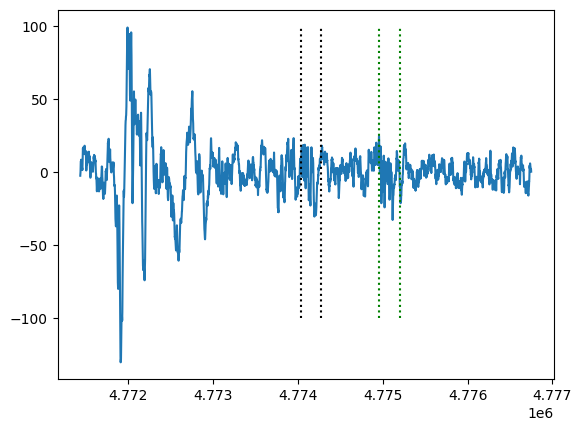

In [ ]:
plt.plot(np.arange(aux.iloc[0].startInd,aux.iloc[0].stopInd),signals['0006'][aux.iloc[0].startInd:aux.iloc[0].stopInd])
plt.vlines([4774041,4774268],ymin=-100,ymax=100,linestyles=":",color='black')
plt.vlines([4774951,4775202],ymin=-100,ymax=100,linestyles=":",color='green')